In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/official-crime-stats-mexico-2015-2023/mexico_crime.csv


In [2]:
df = pd.read_csv('/kaggle/input/official-crime-stats-mexico-2015-2023/mexico_crime.csv')

In [3]:
df.sample(10)

,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,month,count
140204,2023,23,Quintana Roo,Heritage or property,Robbery,Business Robbery,Without violence,May,121
50908,2022,8,Chihuahua,Heritage or property,Robbery,Motor Vehicle Theft,Theft of small and large boats Without violence,February,0
165381,2022,24,San Luis Potosí,Heritage or property,Robbery,Individual Public Transport Robbery,With violence,June,1
315380,2017,19,Nuevo León,Life and bodily integrity,Injuries,Unintentional Injury,With another element,December,7
228766,2015,31,Yucatán,Sexual freedom and security,Sexual harassment,Sexual Bullying,Sexual bullying,September,0
170797,2015,15,México,The family,Domestic violence,Family Violence,Family violence,July,460
22583,2022,7,Chiapas,Heritage or property,Robbery,Motor Vehicle Theft,Motorcycle theft With violence,January,19
247196,2021,27,Tabasco,Heritage or property,Robbery,Home Burglary,Without violence,September,130
161525,2021,17,Morelos,Life and bodily integrity,Feminicide,Feminicide,Not specified,June,0
57785,2015,14,Jalisco,Heritage or property,Robbery,Business Robbery,With violence,March,70


# A few example use cases

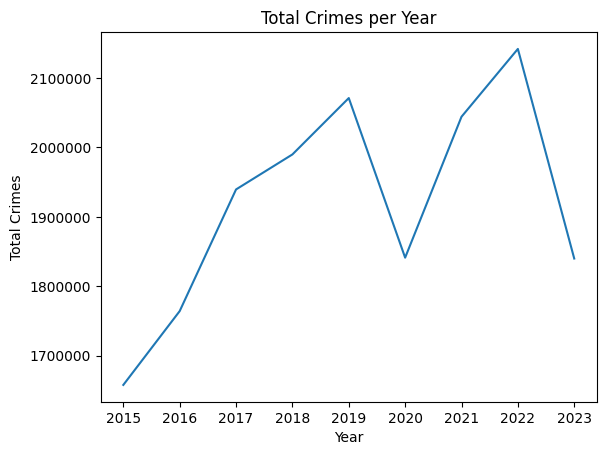

In [4]:
# Plot total crimes over time
df.groupby(["year"])["count"].sum().plot()
ax = plt.gca()

# Set y-axis label format to plain (not scientific notation)
ax.ticklabel_format(style='plain', axis='y')

plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.title("Total Crimes per Year")

# Show the plot
plt.show()

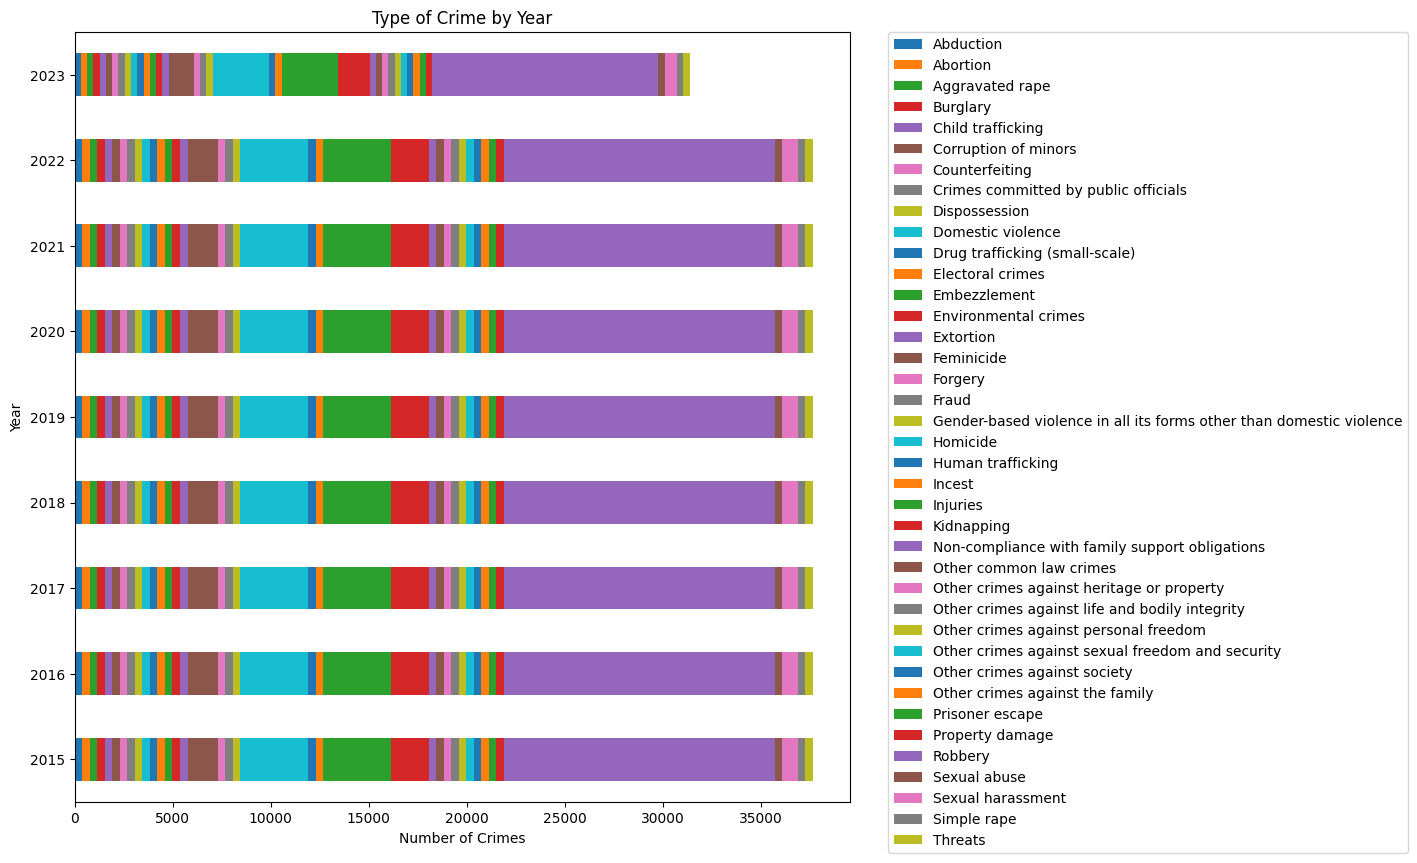

In [5]:
# horizontal bar type_of_crime count by year 2023
df.groupby(['year','type_of_crime']).size().unstack().plot(kind='barh',stacked=True,figsize=(10,10))

plt.title('Type of Crime by Year')
plt.ylabel('Year')
plt.xlabel('Number of Crimes')
# size of the plot
plt.rcParams['figure.figsize'] = (20, 20)
# legend seperate box
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# set new color shcema
plt.set_cmap('Set2')


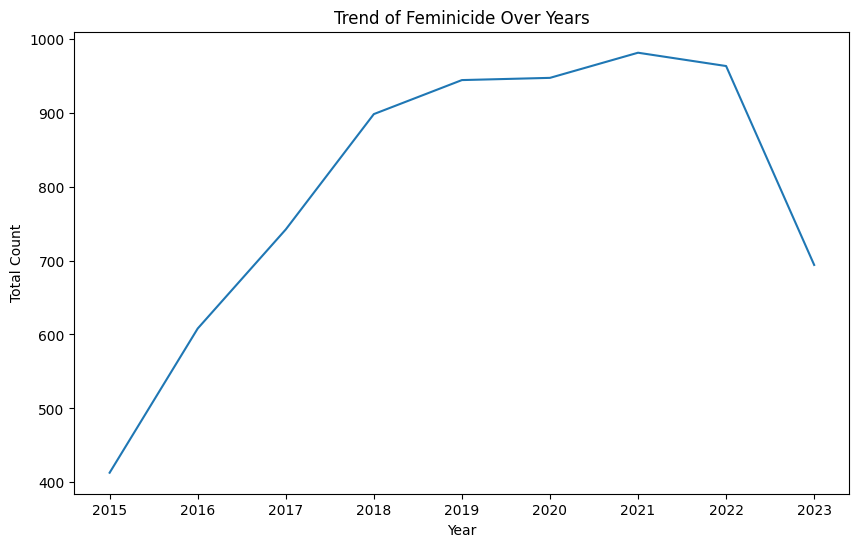

In [6]:
# Filtering for a specific type of crime, e.g., 'Feminicide'
feminicide_data = df[df["type_of_crime"] == "Feminicide"]

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=feminicide_data, x="year", y="count", estimator=sum, errorbar=None)
plt.title("Trend of Feminicide Over Years")
plt.ylabel("Total Count")
plt.xlabel("Year")
plt.show()

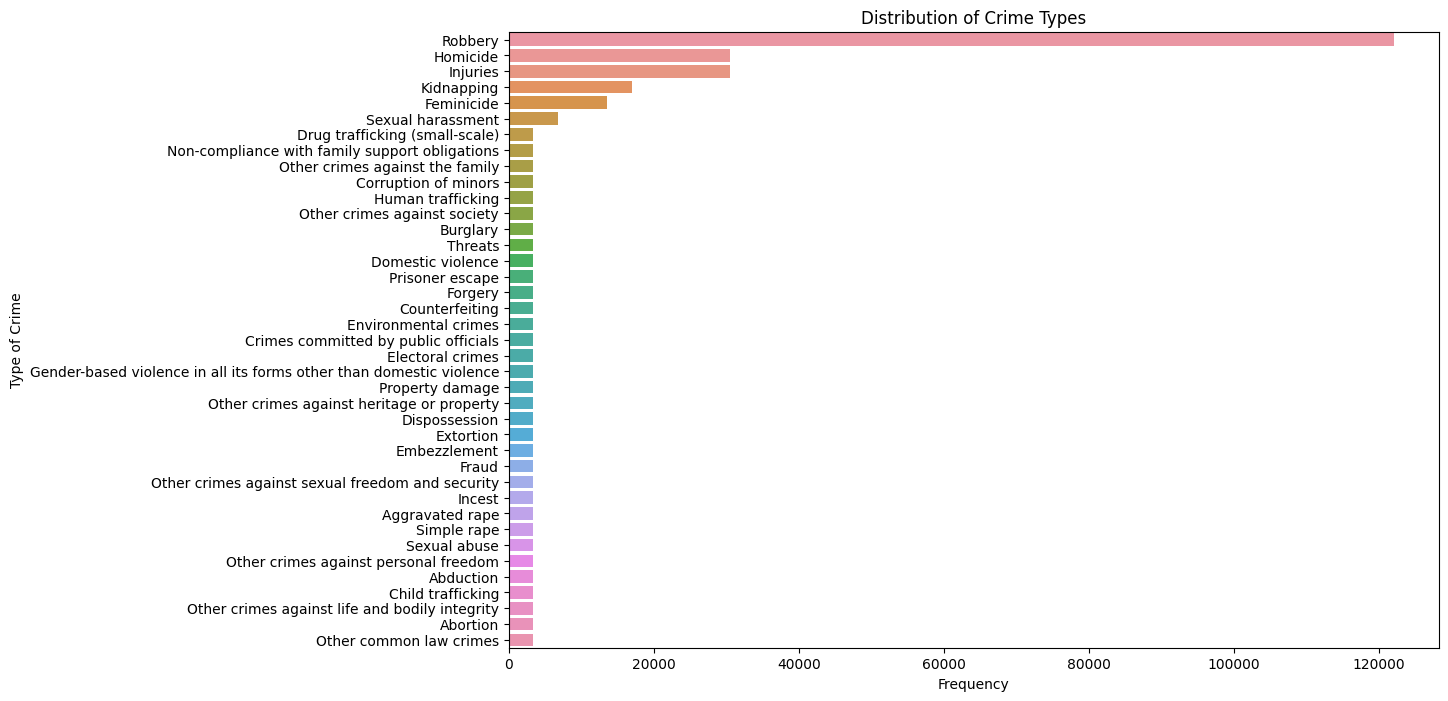

In [7]:
# Counting the occurrences of each crime type
crime_counts = df["type_of_crime"].value_counts()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=crime_counts.values, y=crime_counts.index)
plt.title("Distribution of Crime Types")
plt.xlabel("Frequency")
plt.ylabel("Type of Crime")
plt.show()

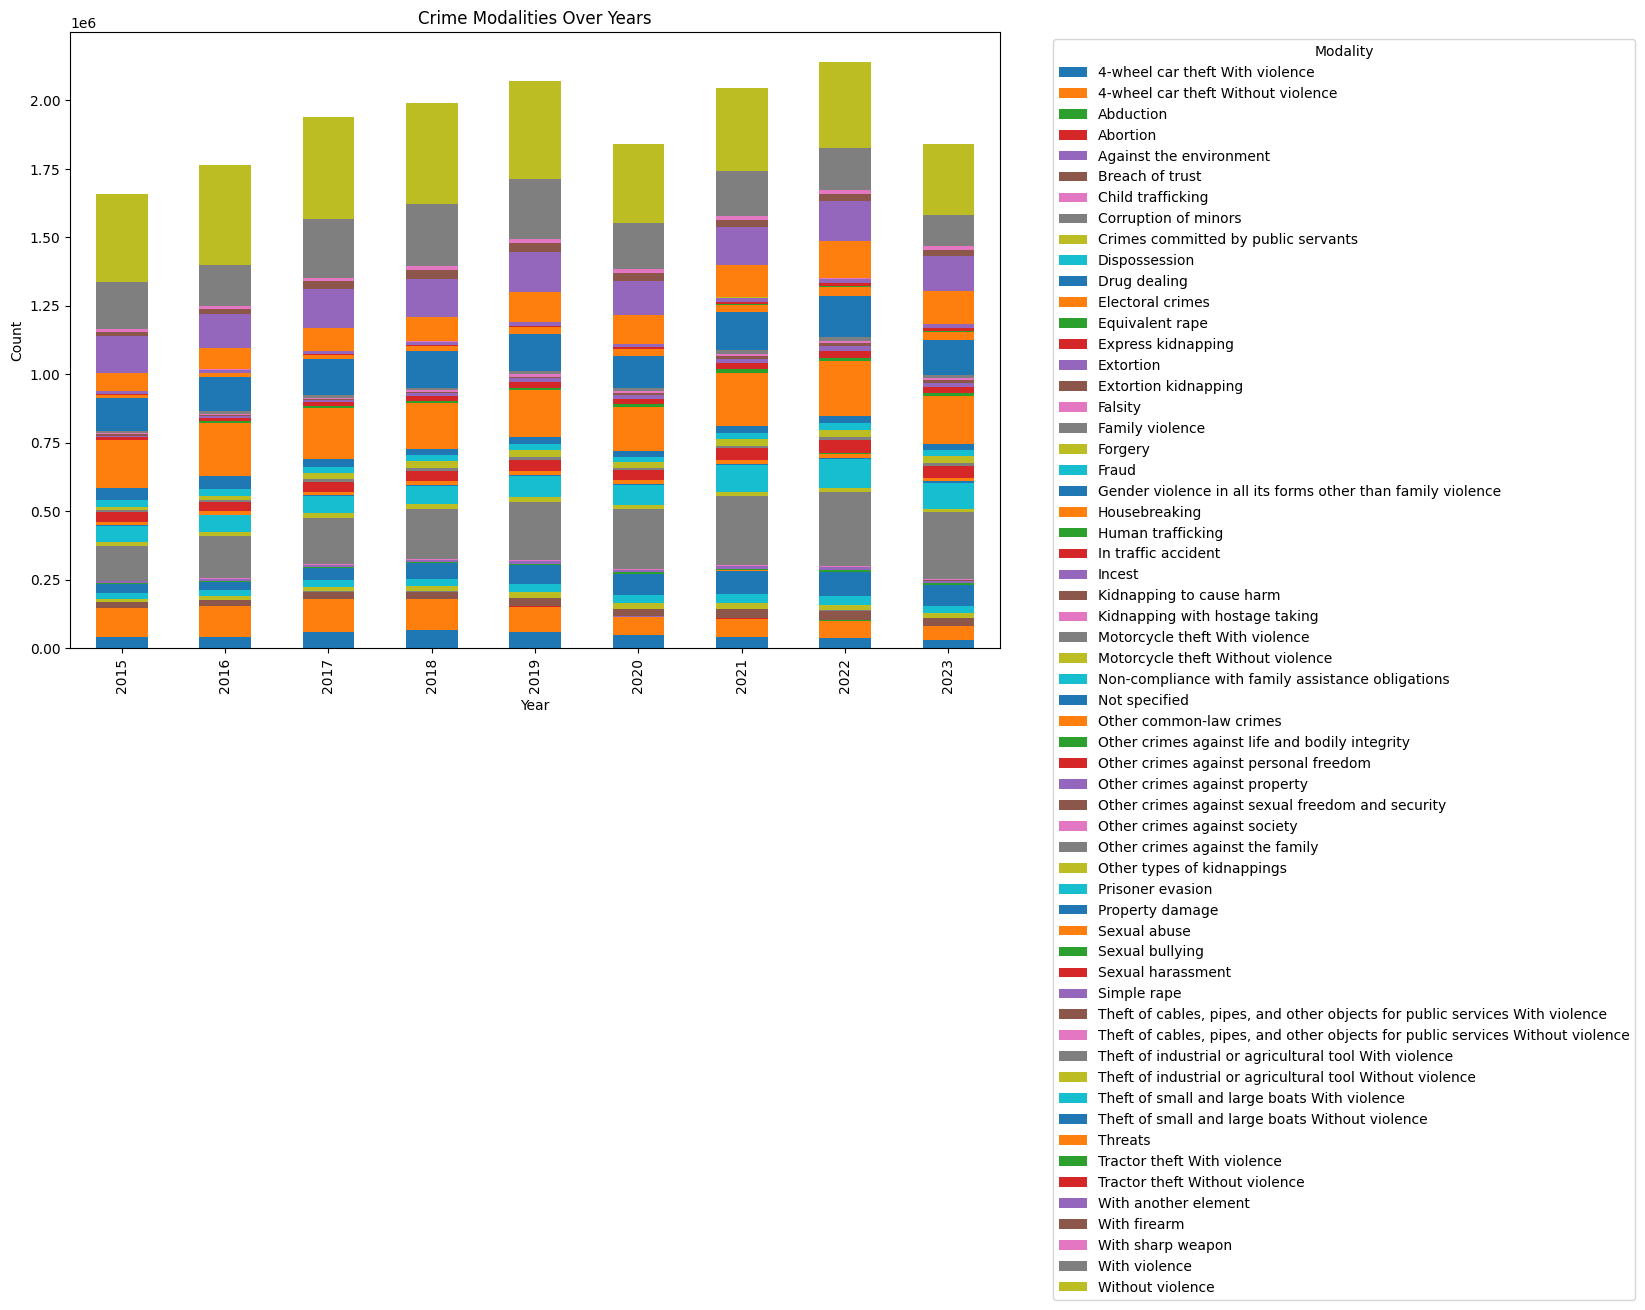

In [8]:
# Creating a DataFrame for the stacked bar chart
modality_counts = df.groupby(["year", "modality"])["count"].sum().unstack(fill_value=0)

# Plotting
modality_counts.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("Crime Modalities Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Modality", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

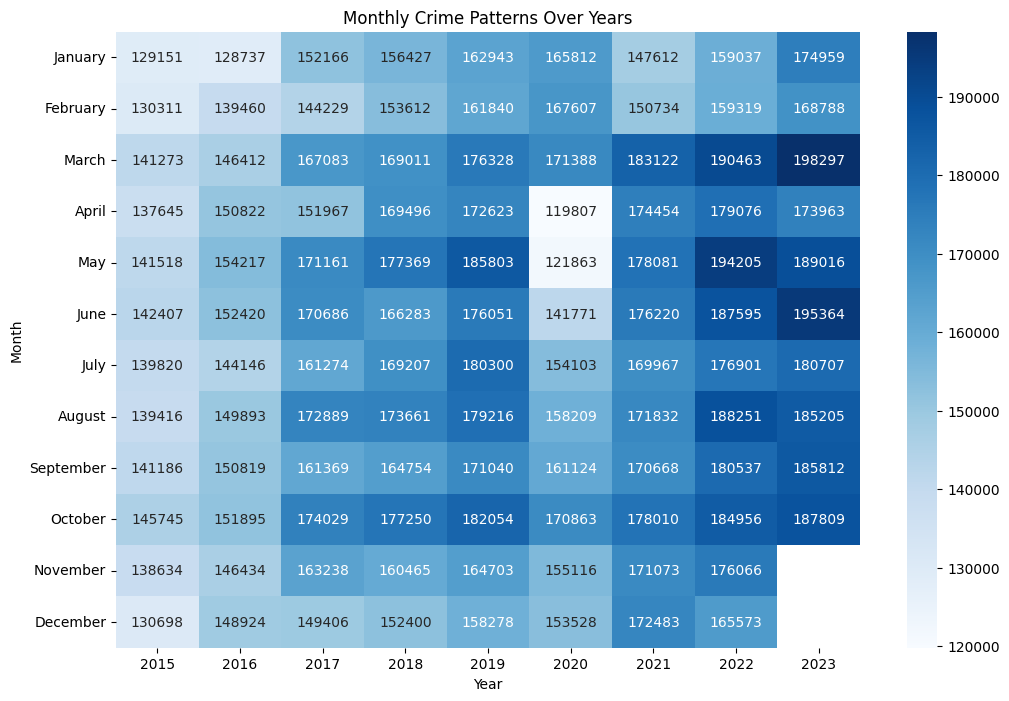

In [9]:
# Creating a dictionary to map month names to numbers
month_to_num = {
    month: index for index, month in enumerate(calendar.month_name) if month
}

# Mapping month names to numbers in the DataFrame
df["month_num"] = df["month"].apply(lambda x: month_to_num[x])

# Creating a pivot table with numeric months
pivot_table = df.pivot_table(
    values="count", index="month_num", columns="year", aggfunc="sum"
)

# Sorting index to ensure months are in order
pivot_table = pivot_table.sort_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    yticklabels=list(calendar.month_name)[1:],
)
plt.title("Monthly Crime Patterns Over Years")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()